In [1]:
import pandas as pd
import numpy as np
!ls CodedOutputs/

'2022_09_27 Coding Outputs.csv'   graylit_outputs.json	 survey_outputs.json
 gray_lit_coded.csv		  survey_coded.csv
 graylit_codes.json		  survey_codes.json


In [2]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    
    return df.rename(columns=lambda x: x.strip().lower())


In [3]:
llm = pd.read_csv("CodedOutputs/gray_lit_coded.csv")
human = pd.read_csv("CodedOutputs/2022_09_27 Coding Outputs.csv")
human = trim_all_columns(human)
llm = trim_all_columns(llm)

In [4]:
human = human.set_index('unnamed: 0')


In [5]:
llm = llm.set_index('unnamed: 0')

In [6]:
llm = llm.drop([c for c in llm.columns.values if c.startswith("unnamed")], axis=1)
# llm = llm.drop(['federal', 'state','local', 'regional agency'], axis=1)
human = human.drop([c for c in human.columns.values if c.startswith("unnamed")], axis=1)
# human = human.drop(['federal', 'state','local', 'regional'], axis=1)

In [7]:
combined = human.join(llm, lsuffix="_human").dropna()

In [8]:
len([c for c in combined.columns.values if c.endswith('human')])

95

In [9]:
cols= [c for c in combined.columns.values if c.endswith('human')]
cols.extend([c.split("_")[0] for c in combined.columns.values if c.endswith('human')])

In [10]:
print(len(cols))
# combined[cols].eq(combined[cols].iloc[:, 0], axis=0).all(1)

190


In [11]:
combined.apply(lambda x: np.sum(x==0),axis=1).sort_values()
[[c for c in combined.columns if c not in cols]]

[['all', 'healthcare']]

In [12]:

combined['prob_1']=combined[cols].apply(lambda x: np.sum(x==1)/len(cols), axis =1)
combined['prob_0']=combined[cols].apply(lambda x: np.sum(x==0)/(len(cols)-1), axis =1)
combined['krippendorfs']= combined.apply(lambda x: (x.prob_1*x.prob_0)*len(cols), axis=1)


In [13]:
combined.sort_values("krippendorfs")

,local_human,regional_human,state_human,federal_human,audience_human,operators_human,governmental or tribal officials_human,end-users_human,operators-in-training_human,technical considerations_human,...,federal,state,regional,governmental or tribal officials,operators-in-training,end-users,operators,prob_1,prob_0,krippendorfs
unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AFE_2022_Alaska Connect Information.pdf,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.073684,0.925926,12.962963
AK DEC_2022_More About the Operator Training & Certification Program.pdf,0,0,1,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.089474,0.910053,15.470899
AFE_2022_Environmental Worker Training.pdf,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.126316,0.873016,20.952381
AK DEC_2022_Capacity Development.pdf,0,0,1,0,1,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.131579,0.867725,21.693122
AFE_2022_Environmental Technician Apprenticeship Information.pdf,0,0,1,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.136842,0.862434,22.423280
EPA_2000_Operator Certification Guidelines Implementation Guidance.pdf,0,0,0,1,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.173684,0.825397,27.238095
AWWA_2019_Cybersecurity Risk&Responsibility in the Water Sector.pdf,0,0,0,1,1,1,1,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.178947,0.820106,27.883598
AWWA_nd_WSO-WPP-Study Tactics.pdf,0,0,0,1,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.189474,0.809524,29.142857
AK DEC_nd_How DEC Determines Eligibility For Provisional Certification.pdf,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.200000,0.798942,30.359788


In [14]:
import matplotlib.pyplot as plot
%matplotlib inline

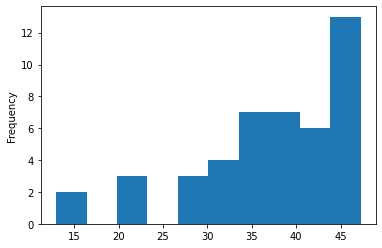

In [15]:
ax = combined["krippendorfs"].plot.hist()
plot.show()